# Business Problem

# Data Preparation

In [1]:
#Importing necassary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading data 
df = pd.read_csv("diabetes.csv")

#Checking the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Checking variable type in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Checking for null values in the dataframe
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#Separating input and output variables

#Input variables
X=df.drop('Outcome',axis=1)

#Output variable
y=df['Outcome']

# Exploratory Data Analysis

### Univariate Analysis

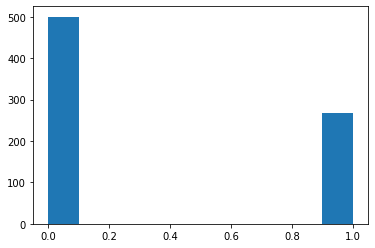

In [6]:
# Create histogram for the outcome variable
plt.hist(y)

# Show graphic
plt.show()

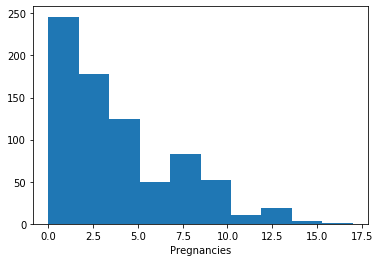

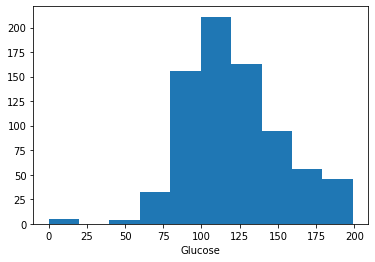

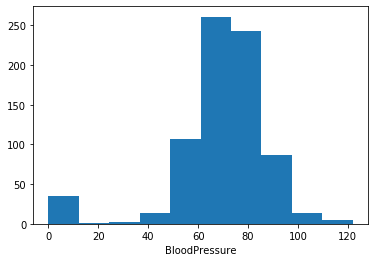

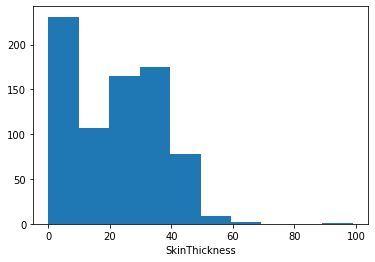

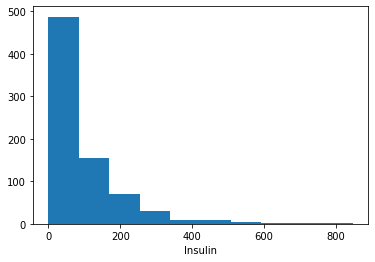

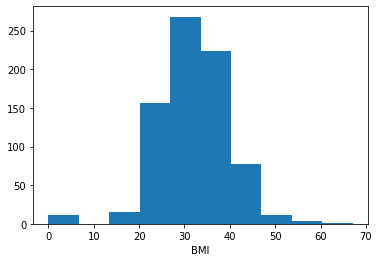

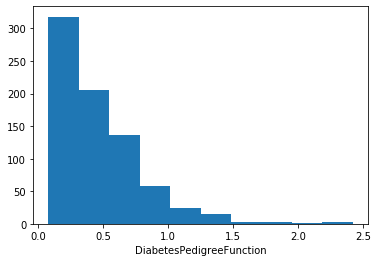

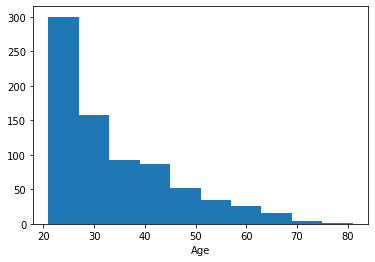

In [7]:
#Checking histogram of the input features

for col in X.columns:
    plt.hist(X[col])
    plt.xlabel(col)
    plt.show()

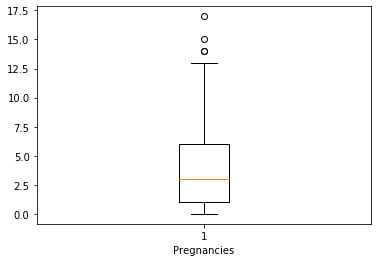

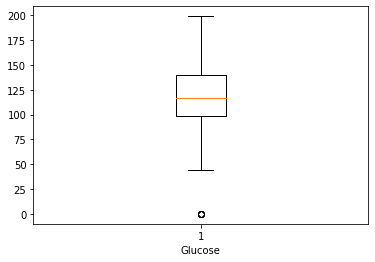

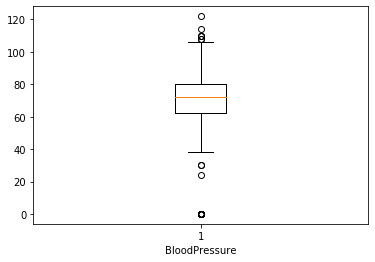

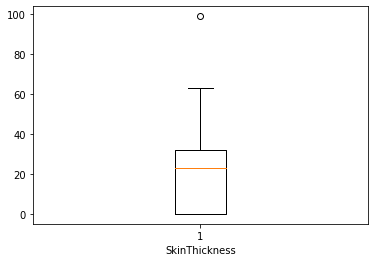

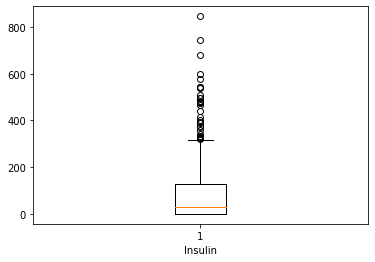

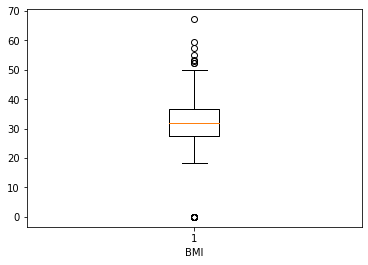

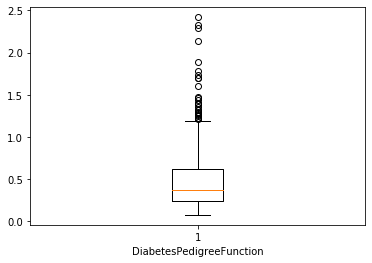

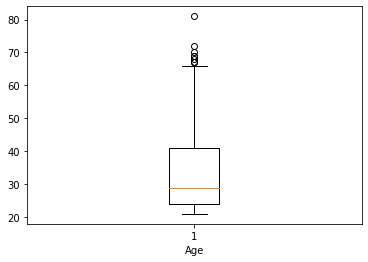

In [8]:
#Checking histogram of the input features

for col in X.columns:
    plt.boxplot(X[col])
    plt.xlabel(col)
    plt.show()

### Outlier Treatment

In [9]:
#Capping extreme outliers above 99% and 1% percentile of the dataset

def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

capping the  Pregnancies
capping the  Glucose
capping the  BloodPressure
capping the  SkinThickness
capping the  Insulin
capping the  BMI
capping the  DiabetesPedigreeFunction
capping the  Age
capping the  Outcome


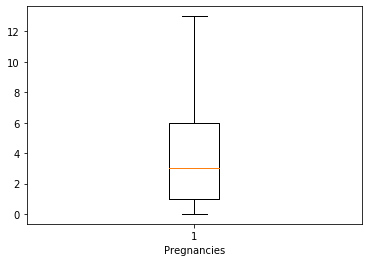

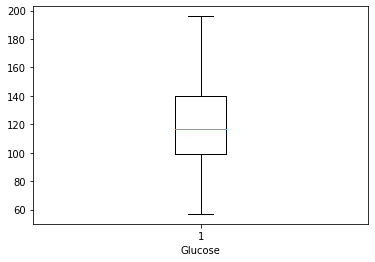

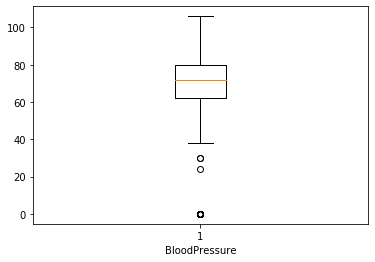

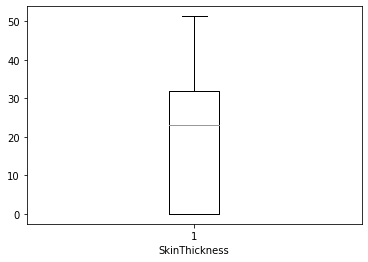

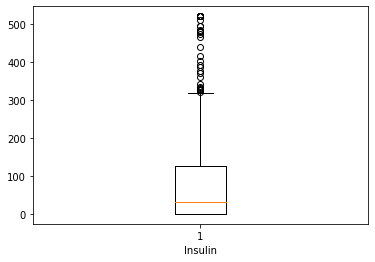

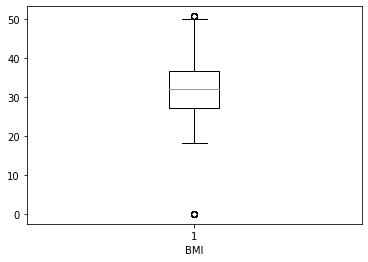

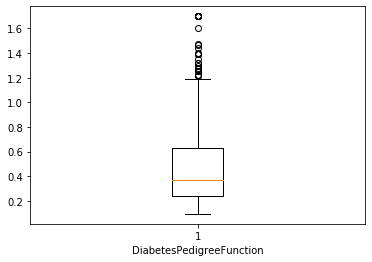

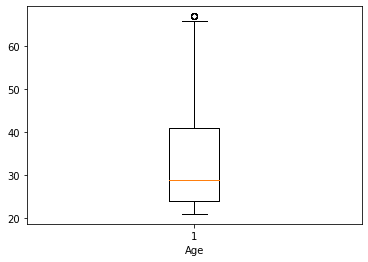

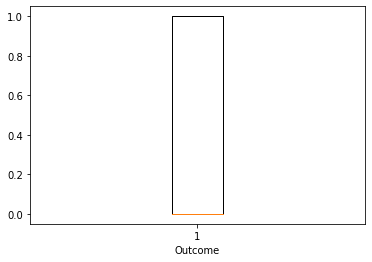

In [10]:
#Checking histogram of the input features after outliers treatment 

for col in final_df.columns:
    plt.boxplot(final_df[col])
    plt.xlabel(col)
    plt.show()

### Bivariate Analysis

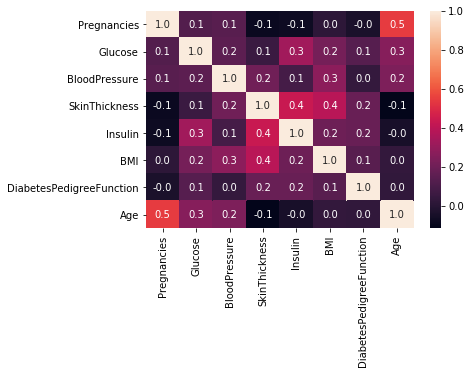

In [11]:
#Checking correlation between input features

sns.heatmap(X.corr(),fmt=".1f",annot=True)
plt.show()

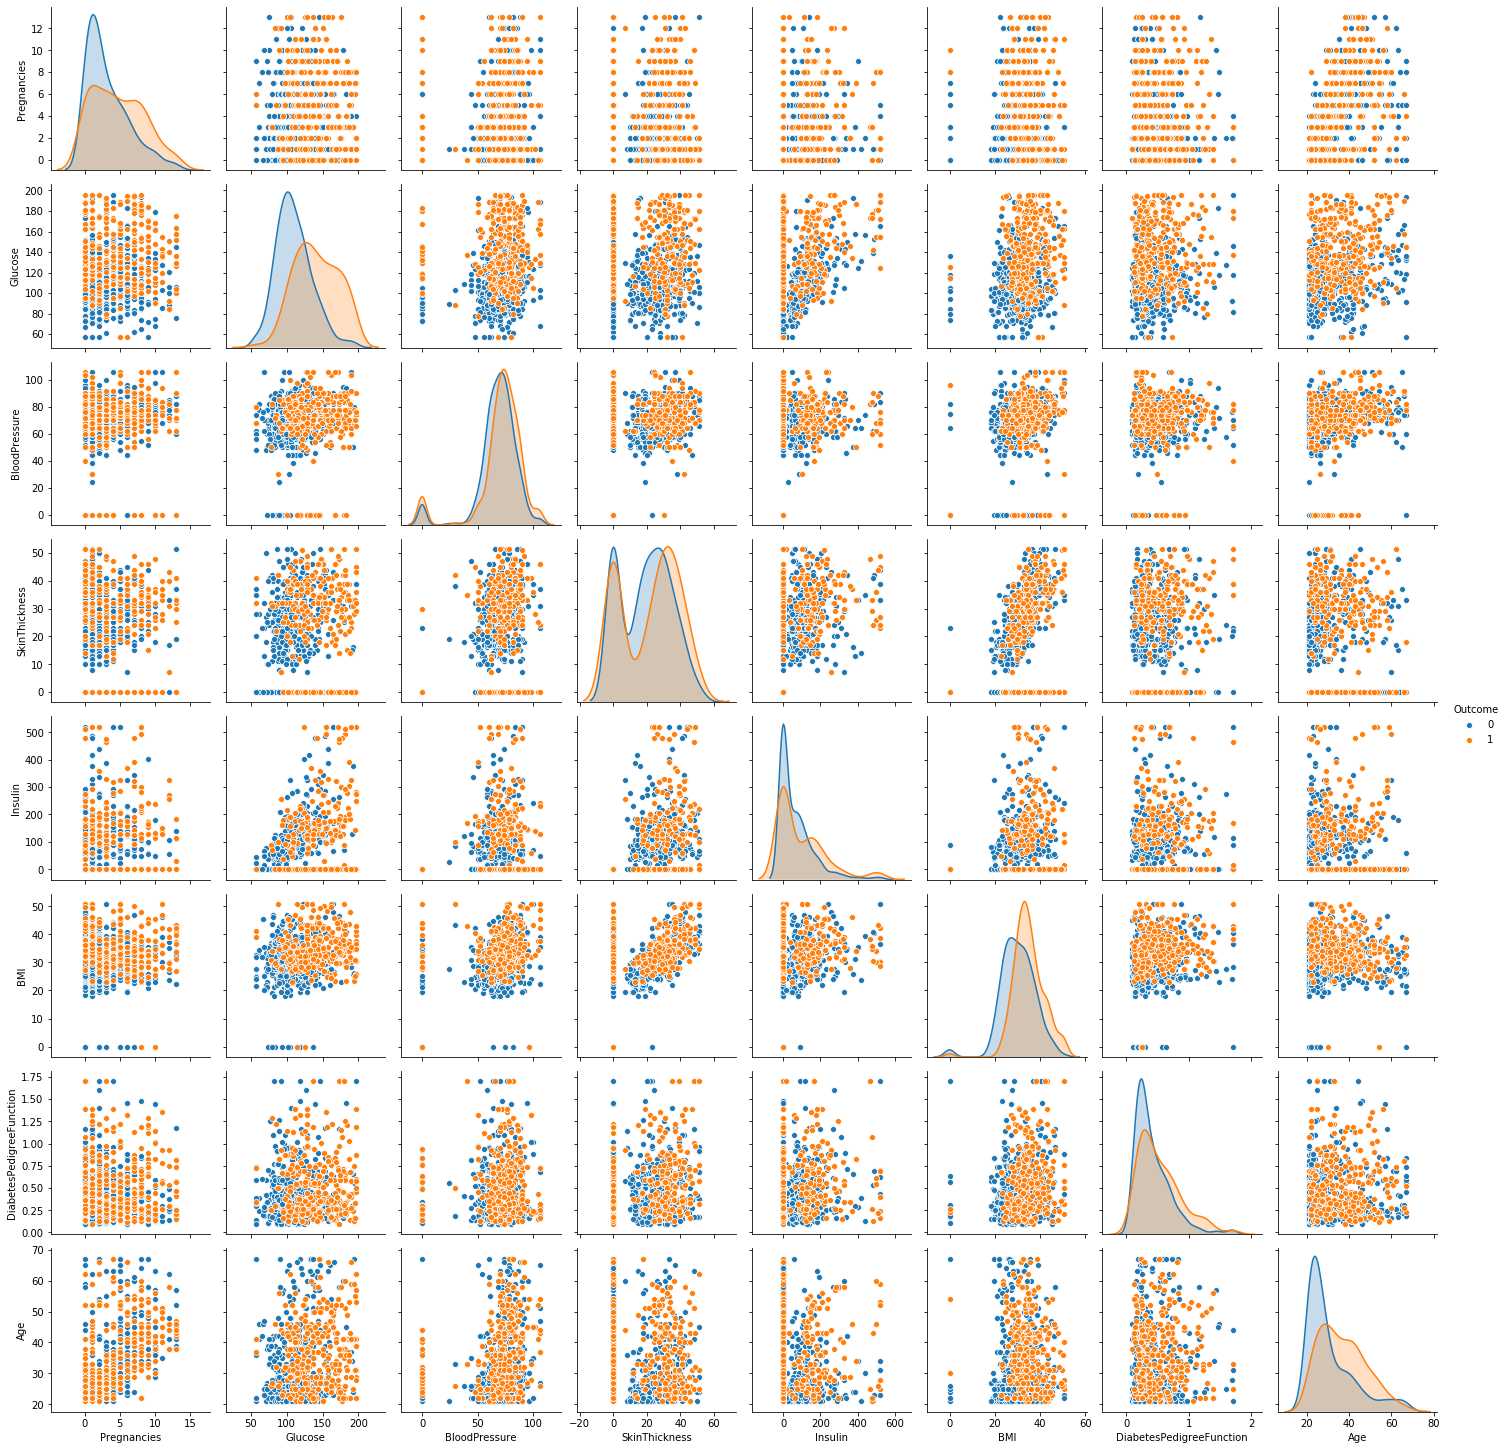

In [12]:
#Pair plot
sns.pairplot(final_df, hue = 'Outcome')

# Data Preprocessing

### Applying SMOTE (upsampling unbalanced dataset)

In [13]:
#Separating input and output variables

#Input variables
X=final_df.drop('Outcome',axis=1)

#Output variable
y=final_df['Outcome']

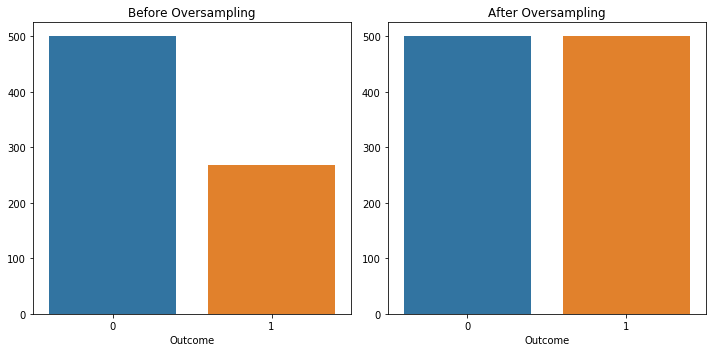

In [14]:
fig, ax = plt.subplots(1,2 ,figsize = (10,5))

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax[0])
ax[0].set_title("Before Oversampling")
ax[0].set_xlabel('Outcome')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X, y = sm.fit_resample(X, y) 

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax[1])
ax[1].set_title("After Oversampling")
ax[1].set_xlabel('Outcome')

plt.tight_layout()
plt.show()

In [15]:
y.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

### Scaling the data

In [16]:
#Using sklearn for scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
X_data_scaled = scaler.fit_transform(X)
X_data_scaled = pd.DataFrame(X_data_scaled)
X_data_scaled.columns = features
X_data_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.613205,0.723293,0.149519,0.904025,-0.701761,0.135258,0.447047,1.452109
1,-0.896409,-1.288250,-0.158556,0.524528,-0.701761,-0.828853,-0.428708,-0.250772
2,1.217051,1.840818,-0.261247,-1.309709,-0.701761,-1.283363,0.589834,-0.161146
3,-0.896409,-1.160533,-0.158556,0.145031,0.143343,-0.622258,-1.012545,-1.147025
4,-1.198332,0.372072,-1.493547,0.904025,0.808637,1.443695,3.846407,-0.071521


# Model Building & Evaluation

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y, test_size=0.2, random_state=42)

## Logistic Regression

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [21]:
#Model Building

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
predictions_logit = logit_model.predict(X_test)

In [22]:
#Model Performance

print("Accuracy:",accuracy_score(y_test, predictions_logit))
print("Precision:",precision_score(y_test, predictions_logit))
print("Recall:",recall_score(y_test, predictions_logit))
print("F1 score:",f1_score(y_test, predictions_logit))
conf_matrix =  confusion_matrix(y_test, predictions_logit)
print(conf_matrix)
print("AUC ROC:",roc_auc_score(y_test, predictions_logit))

Accuracy: 0.745
Precision: 0.7403846153846154
Recall: 0.7623762376237624
F1 score: 0.751219512195122
[[72 27]
 [24 77]]
AUC ROC: 0.7448244824482448


### Tuning Hyperparameters

In [23]:
#Using GridSearchCV for hyperparameters

clf = LogisticRegression()
parameter_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}

#Gridsearch
gridsearch = GridSearchCV(clf, parameter_grid)
gridsearch.fit(X_train, y_train);

#Get best hyperparameters
print(gridsearch.best_params_)

{'C': 0.1, 'penalty': 'l2'}


In [24]:
#Model Performance after GridSearchCV

predictions_logit = gridsearch.predict(X_test)
print("Accuracy:",accuracy_score(y_test, predictions_logit))
print("Precision:",precision_score(y_test, predictions_logit))
print("Recall:",recall_score(y_test, predictions_logit))
print("F1 score:",f1_score(y_test, predictions_logit))
conf_matrix =  confusion_matrix(y_test, predictions_logit)
print(conf_matrix)
print("AUC ROC:",roc_auc_score(y_test, predictions_logit))

Accuracy: 0.75
Precision: 0.7428571428571429
Recall: 0.7722772277227723
F1 score: 0.7572815533980582
[[72 27]
 [23 78]]
AUC ROC: 0.7497749774977498


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
#Model Building

#Using max dept of 3 for random forest

clf = RandomForestClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
predictions_forest = clf.predict(X_test)

In [27]:
#Model Performance

print("Accuracy:",accuracy_score(y_test, predictions_forest))
print("Precision:",precision_score(y_test, predictions_forest))
print("Recall:",recall_score(y_test, predictions_forest))
print("F1 score:",f1_score(y_test, predictions_forest))
conf_matrix =  confusion_matrix(y_test, predictions_forest)
print(conf_matrix)
print("AUC ROC:",roc_auc_score(y_test, predictions_forest))

Accuracy: 0.775
Precision: 0.7456140350877193
Recall: 0.8415841584158416
F1 score: 0.7906976744186047
[[70 29]
 [16 85]]
AUC ROC: 0.7743274327432742


### Tuning Hyperparameters

In [28]:
#Using GridSearchCV for hyperparameters

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
grid_result.best_params_

{'max_features': 'log2', 'n_estimators': 100}

In [29]:
#Model Performance
predictions_forest = grid_result.predict(X_test)
print("Accuracy:",accuracy_score(y_test, predictions_forest))
print("Precision:",precision_score(y_test, predictions_forest))
print("Recall:",recall_score(y_test, predictions_forest))
print("F1 score:",f1_score(y_test, predictions_forest))
conf_matrix =  confusion_matrix(y_test, predictions_forest)
print(conf_matrix)
print("AUC ROC:",roc_auc_score(y_test, predictions_forest))

Accuracy: 0.81
Precision: 0.7787610619469026
Recall: 0.8712871287128713
F1 score: 0.822429906542056
[[74 25]
 [13 88]]
AUC ROC: 0.8093809380938093


## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
#Model Building

#Using max dept of 3 for decision tree

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(X_train,y_train)
predicted = dt.predict(X_test)

In [32]:
#Model Performance

print("Accuracy:",accuracy_score(y_test, predicted))
print("Precision:",precision_score(y_test, predicted))
print("Recall:",recall_score(y_test, predicted))
print("F1 score:",f1_score(y_test, predicted))
conf_matrix =  confusion_matrix(y_test, predicted)
print(conf_matrix)
print("AUC ROC:",roc_auc_score(y_test, predicted))

Accuracy: 0.715
Precision: 0.6549295774647887
Recall: 0.9207920792079208
F1 score: 0.7654320987654321
[[50 49]
 [ 8 93]]
AUC ROC: 0.7129212921292128


### Tuning Hyperparameters

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para)
clf.fit(X_train, y_train)
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [34]:
#Model Performance
predicted = clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, predicted))
print("Precision:",precision_score(y_test, predicted))
print("Recall:",recall_score(y_test, predicted))
print("F1 score:",f1_score(y_test, predicted))
conf_matrix =  confusion_matrix(y_test, predicted)
print(conf_matrix)
print("AUC ROC:",roc_auc_score(y_test, predicted))

Accuracy: 0.77
Precision: 0.7570093457943925
Recall: 0.801980198019802
F1 score: 0.7788461538461539
[[73 26]
 [20 81]]
AUC ROC: 0.7696769676967696


# Model Performace and Business Impact